This stand-alone notebook should be executed within the OUTPUT_FILES directory of a SPECFEM2D use-case.

In [5]:
import os
import numpy as np
import obspy

def get_traces(directory):
    traces = []
    ## iterate over all seismograms
    for filename in os.listdir(directory):
        #print(filename)
        f = os.path.join(directory, filename)
        station_name = os.path.splitext(filename)[0]
        trace = np.loadtxt(f) ##, delimiter=' ')
        starttime = trace[0,0]
        dt = trace[1,0] - trace[0,0]
        traces.append(obspy.Trace(trace[:,1], {'network': station_name, 'starttime': starttime, 'delta': dt}))

    stream = obspy.Stream(traces)

    return stream

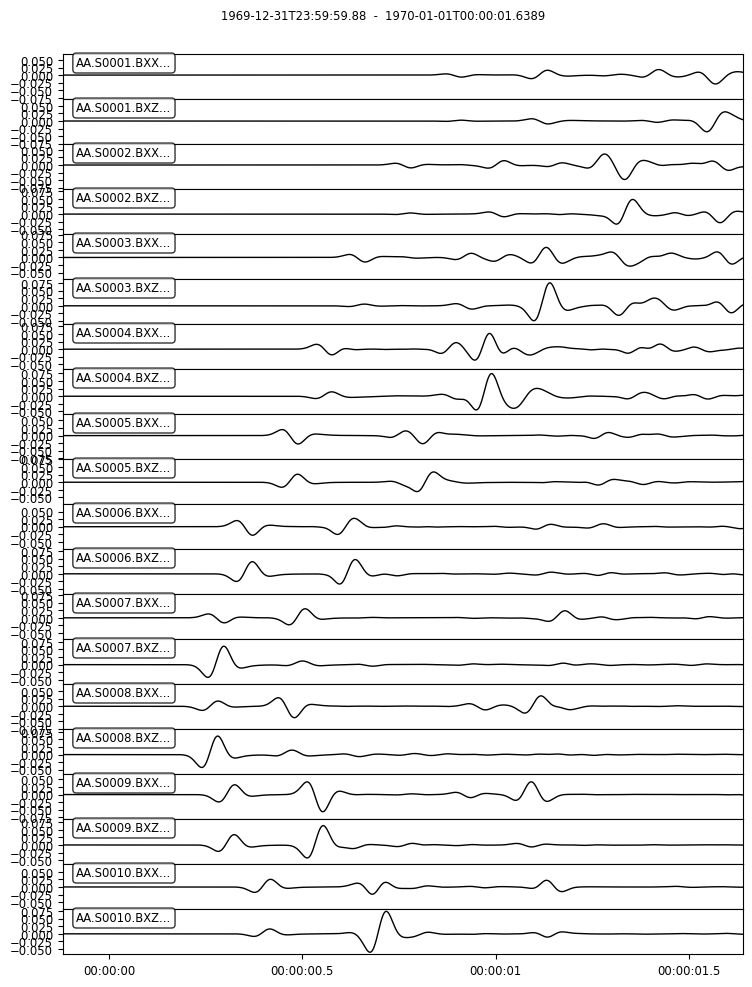

20 Trace(s) in Stream:
AA.S0010.BXZ... | 1969-12-31T23:59:59.880000Z - 1970-01-01T00:00:01.638900Z | 909.1 Hz, 1600 samples
AA.S0007.BXZ... | 1969-12-31T23:59:59.880000Z - 1970-01-01T00:00:01.638900Z | 909.1 Hz, 1600 samples
AA.S0006.BXZ... | 1969-12-31T23:59:59.880000Z - 1970-01-01T00:00:01.638900Z | 909.1 Hz, 1600 samples
AA.S0008.BXX... | 1969-12-31T23:59:59.880000Z - 1970-01-01T00:00:01.638900Z | 909.1 Hz, 1600 samples
AA.S0009.BXX... | 1969-12-31T23:59:59.880000Z - 1970-01-01T00:00:01.638900Z | 909.1 Hz, 1600 samples
AA.S0002.BXX... | 1969-12-31T23:59:59.880000Z - 1970-01-01T00:00:01.638900Z | 909.1 Hz, 1600 samples
AA.S0003.BXX... | 1969-12-31T23:59:59.880000Z - 1970-01-01T00:00:01.638900Z | 909.1 Hz, 1600 samples
AA.S0001.BXZ... | 1969-12-31T23:59:59.880000Z - 1970-01-01T00:00:01.638900Z | 909.1 Hz, 1600 samples
AA.S0005.BXX... | 1969-12-31T23:59:59.880000Z - 1970-01-01T00:00:01.638900Z | 909.1 Hz, 1600 samples
AA.S0004.BXX... | 1969-12-31T23:59:59.880000Z - 1970-01-01T00:00:01.

In [6]:
directory = 'seismograms' #OUTPUT_FILES/seismograms
stream = get_traces(directory)
stream.plot(size=(800, 1000))
print(stream)

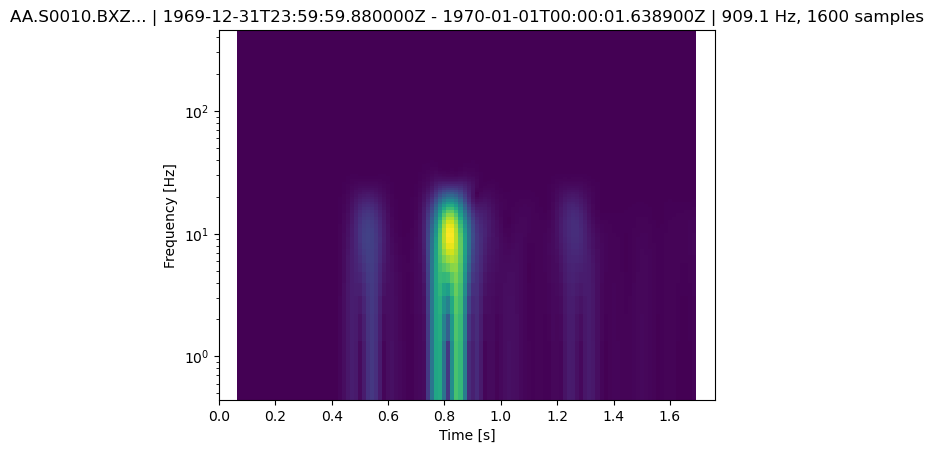

In [7]:
stream[0].spectrogram(log=True)